## lab 4: Multi-Variate Linear Regression

Modify the gradient function given to you earlier to perform multivariate linear regression, i.e., the input contains more than one variable. Then, use the function you created to find the combination of any two dependent variables with the least root mean square error with regards to the response/target variable. You do not need to plot the cost function for this exercise.

In [2]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#for root mean squared error function
from sklearn.metrics import mean_squared_error

print('.')

.


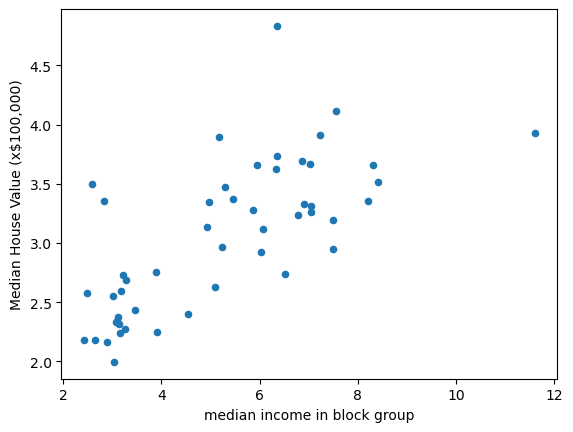

In [3]:
#compute and plot optimal solution for single variable linear regression via gradient descent.
#using subset of boston housing dataset to showcase the model

#loading the dataset
from sklearn.datasets import fetch_california_housing
hd = fetch_california_housing()
# put into a dataframe
housing = pd.DataFrame(hd.data, columns=hd.feature_names)
housing['target'] = hd.target
housing.iloc[100:150,:].plot.scatter(x='MedInc', y='target')
plt.xlabel('median income in block group')
plt.ylabel('Median House Value (x$100,000)')
plt.show()

In [4]:
print(hd.DESCR) #description of the housing dataset

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [10]:
#finding the best model via gradient descent

def gradient(t, X, y):
    """Compute the current error and gradient."""
    # Hypothesis/estimate values for y
    y_estimate = X.dot(t).flatten()
    #print("this is y_estimate", y_estimate, len(y_estimate))
    # Loss - the difference between the estimated and actual values of y
    loss = y.flatten() - y_estimate
    #print("this is loss", loss)
    m = float(len(X))
    #print("this is m", m)
    # Compute gradient
    grad = -(1.0 / m) * loss.dot(X)
    # Cost function value
    # we want the root mean squared error
    # so we use the function from sklearn metrics
    cost = mean_squared_error(y, X.dot(t))
    return grad, cost


#adding second variable w to parameters
def gradient_descent(w, x, y, alpha=0.5, tolerance=1e-5, maxit=1e+6, nulbias=False):
    """Finds the best line fit for predicting y given x and w.
       Keep track of and also return tested models, gradients, and errors 
       along the optimization path.
    """
    # add intercept term to x -- acounts for the bias -- and normalize x's
    # for multivariate linear regression, add w and normalize it
    X = np.vstack((np.ones_like(x), w/w.max(), x/x.max())).T

    # y = theta0 + theta1.w + theta2.x
    # start with a random (or zeros) theta vector
    # t should be length 3 now because we have 3 thetas to consider: bias, w, and x
    # t[0] is the bias
    t = np.random.randn(3)
    if nulbias:
        t[0] = 0
    # perform gradient descent
    it = 0
    models = []
    grads = []
    errors = []
    while it < maxit: #iterator goes from 0 to max iterations allowed
        grad, error = gradient(t, X, y)
        models.append(t)
        grads.append(grad)
        errors.append(error)
        new_t = t - alpha * grad
        if nulbias:
            new_t[0] = 0
        # check whether we should stop (model converged)
        if np.sum(abs(new_t - t)) < tolerance:
            break
        # update theta
        t = new_t
        it += 1
    if it == maxit:
        print("Warning: reached maximum number of iterations without convergence.")
    return X, t, models, grads, errors

# would add w but we do not need to plot
def plotmodel(x, y, t, start_at_zero=False):
    """Plot the line of a given model."""
    if t is not None:
        if start_at_zero:
            x = np.append([0], x)
            y = np.append([0], y)
        plt.plot(x, t[0] + x/x.max() * t[1], c='g', label='Model')
        #X = np.vstack((np.ones_like(x), x/x.max(), w/w.max())).T
        #plt.plot(x, X.dot(t), c='g', label='Model')
#         equivalent to:
#         X = np.vstack((np.ones_like(x), x/x.max())).T
#         plt.plot(x, X.dot(t), c='g', label='Model')
    plt.scatter(x, y, c='b', label='Data')
    plt.legend(loc='best')
    plt.xlabel('MedInc')
    plt.ylabel('Median House Price (x$100,000)')
    if start_at_zero:
        plt.ylim(ymin=0)
        plt.xlim(xmin=0)
    plt.show()

In [6]:
housing.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [9]:
#iterate through all combinations of two dependent variables
#predict the response 'target' from its values
#take all samples from the dataset
data = housing.loc[:, ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']].to_numpy()
#set to clarify names of dependent variables
featurelist = ['median income', 'house age', 'average rooms', 'average bedrooms', 'population', 'average occupancy', 'latitude', 'longitude']

i=0 #index of the first dependent variable
k=0 #index of the second dependent variable
ibest=0 #index of the first variable with lowest root mean squared error
jbest=0 #index of second variable with lowest root mean squared error
lowesterror = float(1) #lowest root mean squared error value
while i<7:
    j = i+1
    while j<8:
        #print which combination of two features we are analyzing
        print(featurelist[i], ',', featurelist[j])
        w = data[:,i] #1d array of first dependent variable
        x = data[:,j] #1d array of second dependent variable
        y = data[:,8] #1d array of target variable

        #assuming no bias term makes visualizing parameter space easier
        #find best model after some iterations
        X, t, models, grads, errors = gradient_descent(w, x, y, nulbias=True)
        print("# iterations: ", len(models))
        print("first model: ", models[0])
        print("best model: ", t)

        nits = len(models) - 1
        print("gradient on best model: ", grads[nits])
        print("root mean squared error of best model: ", errors[nits], '\n')

        if errors[nits] < lowesterror:
            lowesterror = errors[nits] # keep track of lowest error
            ibest = i
            jbest = j
        k += 1
        j += 1
    i += 1

print(k, "combinations completed")
print("the lowest root mean squared error combination was from variables:")
print(featurelist[ibest], 'and', featurelist[jbest])
print(lowesterror)

median income , house age
# iterations:  724
first model:  [ 0.         -1.01112799  0.37431496]
best model:  [0.         6.31225124 0.81433917]
gradient on best model:  [ 8.77907379e-03 -1.40405489e-05  5.78116976e-06]
root mean squared error of best model:  0.6545282155807051 

median income , average rooms
# iterations:  8540
first model:  [ 0.         -1.08129866  1.26666883]
best model:  [0.         7.40086665 2.15461326]
gradient on best model:  [-7.63874465e-02 -2.28267146e-06  1.77171034e-05]
root mean squared error of best model:  0.7387699290229484 

median income , average bedrooms
# iterations:  21583
first model:  [0.         0.68405027 2.53363032]
best model:  [0.         6.9890974  6.93525494]
gradient on best model:  [-4.18104818e-02  1.81322992e-06 -1.81849307e-05]
root mean squared error of best model:  0.720303502704398 

median income , population
# iterations:  6996
first model:  [ 0.         -0.11214923 -0.37698454]
best model:  [0.         7.44601011 1.84931103]
